In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import deepchem as dc
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Silence warnings
import warnings
from rdkit import RDLogger
warnings.filterwarnings("ignore", category=DeprecationWarning)
RDLogger.DisableLog('rdApp.*')

# --- Reproducibility ---
np.random.seed(456)
tf.random.set_seed(456)

In [6]:
# Step 1: Load the Tox21 Dataset
_, (train, valid, test), _ = dc.molnet.load_tox21()

train_X, train_y, train_w = train.X, train.y, train.w
valid_X, valid_y, valid_w = valid.X, valid.y, valid.w
test_X, test_y, test_w = test.X, test.y, test.w

# Step 2: Keep only the first task
train_y = train_y[:, 0]
valid_y = valid_y[:, 0]
test_y = test_y[:, 0]


def train_and_evaluate_toxicology_model(
    d: int = 1024,
    n_hidden: int = 50,
    learning_rate: float = 0.001,
    n_epochs: int = 10,
    batch_size: int = 100,
):
    # Step 4–5: Define model using Keras
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=(d,)),
            tf.keras.layers.Dense(n_hidden, activation="relu"),
            tf.keras.layers.Dropout(0.5),  # Step 6/7: dropout
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    # Step 5b: Compile model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )

    # Step 8: Train model with minibatching
    tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="/tmp/fcnet-tox21")
    history = model.fit(
        train_X, train_y,
        validation_data=(valid_X, valid_y),
        batch_size=batch_size,
        epochs=n_epochs,
        callbacks=[tensorboard_cb]
    )

    # Step 9: Evaluate on validation set
    val_loss, val_acc = model.evaluate(valid_X, valid_y, verbose=0)
    print(f"Validation Accuracy: {val_acc:.4f}")

    # Step 9b: Predictions
    # Predictions
    y_prob = model.predict(valid_X).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(valid_y, y_pred)
    f1 = f1_score(valid_y, y_pred, zero_division=0)
    roc_auc = roc_auc_score(valid_y, y_prob)

    print(f"Validation Accuracy: {acc:.4f}")
    print(f"Validation F1-score: {f1:.4f}")
    print(f"Validation ROC-AUC: {roc_auc:.4f}")

    

    # plot training curve
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9580 - loss: 0.2592 - val_accuracy: 0.9604 - val_loss: 0.1609
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9690 - loss: 0.1599 - val_accuracy: 0.9642 - val_loss: 0.1471
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9725 - loss: 0.1385 - val_accuracy: 0.9642 - val_loss: 0.1427
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9732 - loss: 0.1269 - val_accuracy: 0.9668 - val_loss: 0.1373
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9733 - loss: 0.1172 - val_accuracy: 0.9668 - val_loss: 0.1352
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9748 - loss: 0.1065 - val_accuracy: 0.9680 - val_loss: 0.1348
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.0973 - val_accuracy: 0.9655 - val_loss: 0.1381
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9762 - loss: 0.0903 - val_accuracy: 0.9655 - val_loss:

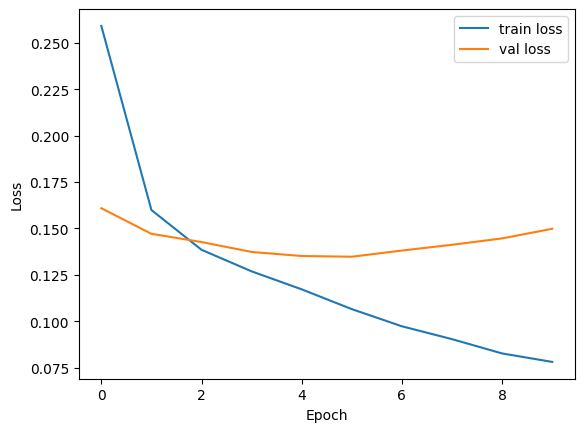

In [7]:
train_and_evaluate_toxicology_model()

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8041 - loss: 0.6412 - val_accuracy: 0.8990 - val_loss: 0.4299
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8453 - loss: 0.5190 - val_accuracy: 0.9194 - val_loss: 0.3528
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8925 - loss: 0.4746 - val_accuracy: 0.9194 - val_loss: 0.3255
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8965 - loss: 0.4361 - val_accuracy: 0.9246 - val_loss: 0.3125
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9022 - loss: 0.3980 - val_accuracy: 0.9297 - val_loss: 0.2871
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9140 - loss: 0.3681 - val_accuracy: 0.9322 - val_loss: 0.2718
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9241 - loss: 0.3371 - val_accuracy: 0.9309 - val_loss: 0.2595
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.3171 - val_accuracy: 0.9386 - val_loss:

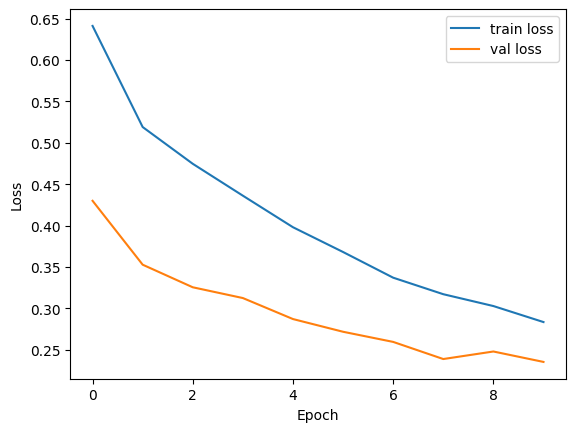

(<Sequential name=sequential_2, built=True>,
 <keras.src.callbacks.history.History at 0x1882ed3f0>)

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def train_and_evaluate_toxicology_model(
    d: int = 1024,
    n_hidden: int = 50,
    learning_rate: float = 0.001,
    n_epochs: int = 10,
    batch_size: int = 100,
):
    # ----- Class weights to address imbalance -----
    class_weights = compute_class_weight(
        class_weight="balanced", classes=np.unique(train_y), y=train_y
    )
    class_weight_dict = {i: w for i, w in enumerate(class_weights)}

    # ----- Define model with dropout + L2 regularization -----
    model = tf.keras.Sequential(
        [
            tf.keras.layers.Input(shape=(d,)),
            tf.keras.layers.Dense(
                n_hidden,
                activation="relu",
                kernel_regularizer=tf.keras.regularizers.l2(1e-4),
            ),
            tf.keras.layers.Dropout(0.6),  # slightly stronger dropout
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )

    # ----- Compile model -----
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=["accuracy"],
    )

    # ----- Callbacks: Early stopping + TensorBoard -----
    early_stopping_cb = tf.keras.callbacks.EarlyStopping(
        patience=2, restore_best_weights=True
    )
    tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="/tmp/fcnet-tox21")

    # ----- Train model -----
    history = model.fit(
        train_X,
        train_y,
        validation_data=(valid_X, valid_y),
        batch_size=batch_size,
        epochs=n_epochs,
        verbose=1,
        class_weight=class_weight_dict,
        callbacks=[early_stopping_cb, tensorboard_cb],
    )

    # ----- Evaluate on validation set -----
    val_loss, val_acc = model.evaluate(valid_X, valid_y, verbose=0)
    print(f"Validation Accuracy (Keras): {val_acc:.4f}")

    # ----- Predictions -----
    y_prob = model.predict(valid_X).ravel()
    y_pred = (y_prob > 0.5).astype(int)

    # ----- Metrics -----
    acc = accuracy_score(valid_y, y_pred)
    f1 = f1_score(valid_y, y_pred, zero_division=0)
    roc_auc = roc_auc_score(valid_y, y_prob)

    print(f"Validation Accuracy (sklearn): {acc:.4f}")
    print(f"Validation F1-score: {f1:.4f}")
    print(f"Validation ROC-AUC: {roc_auc:.4f}")

    # ----- Plot training curve -----
    plt.plot(history.history["loss"], label="train loss")
    plt.plot(history.history["val_loss"], label="val loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    return model, history

train_and_evaluate_toxicology_model()

In [9]:
!tensorboard --logdir /tmp/fcnet-tox21

2025-09-06 21:34:32.302189: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.16.2 at http://localhost:6006/ (Press CTRL+C to quit)
^C
